# Decision Tree Feature Ranking

In [57]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import plot_tree

Plot two classes with three features, with feature two being a binary color feature.

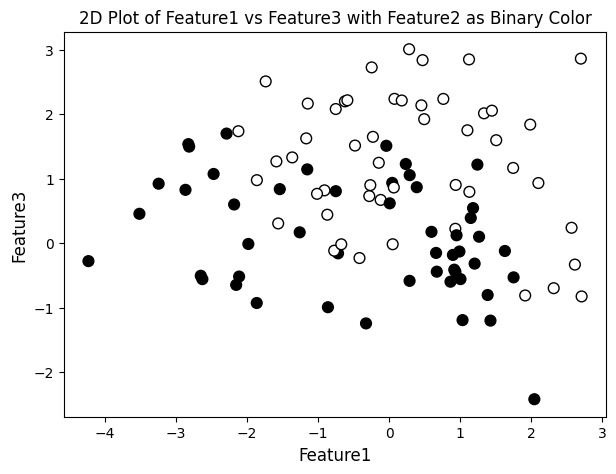

In [51]:
# Generate a dataset with two informative features and one less informative feature
X, y = make_classification(n_samples=100, n_features=3, n_informative=3, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=2, flip_y=0, random_state=42)
# Eplanation of the parameters: 
# n_samples: The number of samples to generate
# n_features: The number of features to generate
# n_informative: The number of informative features
# n_redundant: The number of redundant features
# n_clusters_per_class: The number of clusters per class
# n_classes: The number of classes
# flip_y: The fraction of samples whose class are randomly exchanged
# random_state: The seed used by the random number generator

# Convert to a DataFrame for easier manipulation and naming
df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
df['Target'] = y

# Make Feature2 binary to represent a color distinction
df['Feature2'] = (df['Feature2'] > df['Feature2'].median()).astype(int)

# Plot Feature1 vs Feature3 with color indicating the binary Feature2
plt.figure(figsize=(7, 5))
scatter = plt.scatter(df['Feature1'], df['Feature3'], c=df['Feature2'], cmap='binary', edgecolor='k', s=60)

# Add labels and color bar
plt.xlabel('Feature1', fontsize=12)
plt.ylabel('Feature3', fontsize=12)
plt.title('2D Plot of Feature1 vs Feature3 with Feature2 as Binary Color', fontsize=12)
plt.show()


Plot the datas class using color

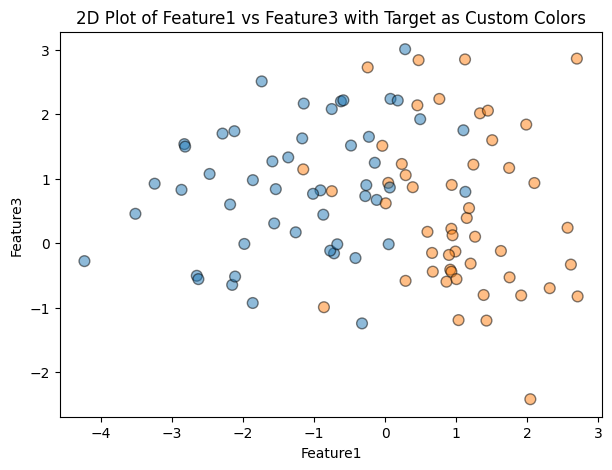

In [53]:
# Define custom colors for the binary classes
color_map = {0: '#1f77b4', 1: '#ff7f0e'}  # Example colors: blue for class 0, orange for class 1
colors = df['Target'].map(color_map)  # Map the target values to the custom colors

# Plot Feature1 vs Feature3 with custom colors indicating the Target
plt.figure(figsize=(7, 5))
scatter = plt.scatter(df['Feature1'], df['Feature3'], c=colors, edgecolor='k', s=60, alpha=.5)
plt.xlabel('Feature1')
plt.ylabel('Feature3')
plt.title('2D Plot of Feature1 vs Feature3 with Target as Custom Colors')
plt.show()

Train a decision tree and rank feature importnace

Visualize the trained decision tree   
Gini value is similer to entopy, the lower the better

To ensure results are reliable find the avarage of feature ranking from many trees  
Although decision trees are deterministic, when multiple splits produce the same gains,   
Scikit-Learn selects the split using a random number generator, resulting in non-deterministic behavior

# Partial Dependency and Individual Conditional Expectation Plots

-------------------------

In this notebook, you will explore the utility of Partial Dependency (PDP) and Individual Conditional Expectation (ICE) plots. 

You will use a bike rental dataset (bike_sharing_data.csv) and its corresponding model (bike_sharing_model.pkl). This dataset includes four features: temp, feel_temp, humidity, and windspeed, each of which affects the number of bike rentals differently. You will test your understanding of PDP and ICE concepts by generating your own code to replicate the results from sklearn's built-in PDP and ICE plotting functions.

-------------------------

- 1.1 | Manually compute the PDP curve for the target feature "temp" and plot the result  
- 1.2 | Manually compute the ICE curves for the target feature of "temp" and plot the results    
- 1.3 | Center the ICE curves and plot the results as well as the average on the same axes  
- 1.4 | Discuss your results  


Import necessary libraries

In [1]:
import joblib # for saving and loading models from sklearn
import numpy as np # for numerical computation
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay # for displaying partial dependence plots and individual conditional expectation
import warnings # filter warnings
warnings.filterwarnings("ignore")

Import the model and data

In [2]:
model = joblib.load('../code/data_models/bike_sharing_model.pkl')
data = pd.read_csv('../code/data_models/bike_sharing_data.csv')

Use sklearn's built-in function to plot the ICE and PDP

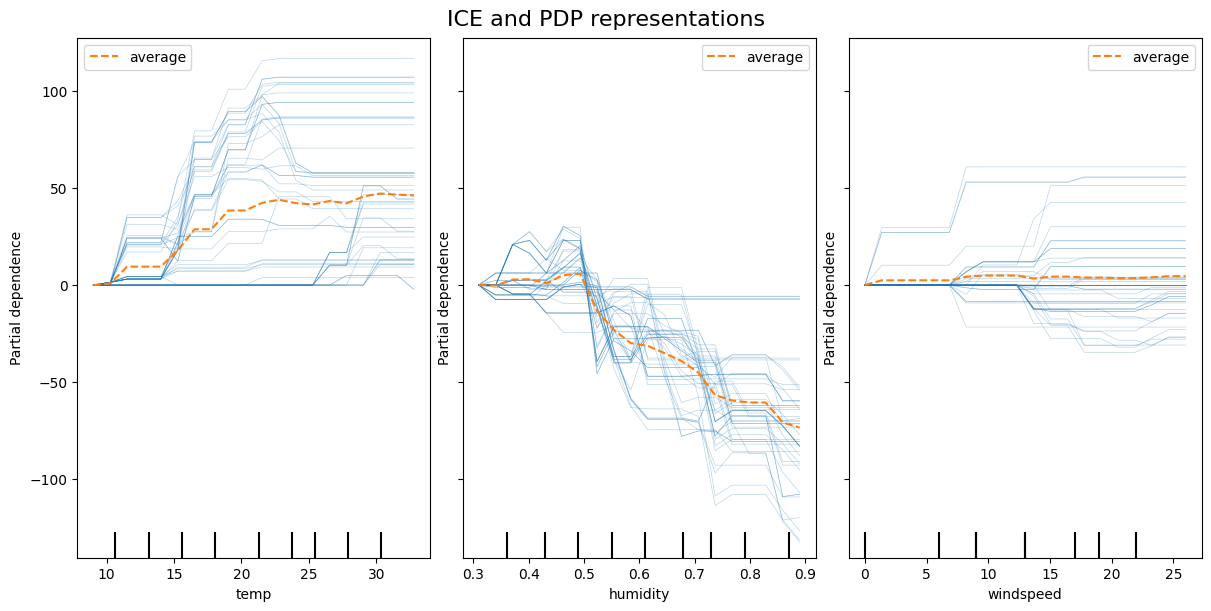

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 6), sharey=True, constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    model, # Pre-trained gradient boosed regressor tree model
    data, # Data to plot
    features=["temp", "humidity", "windspeed"], # Features to plot from the dataframe
    kind="both",  # This will plot both PDP and ICE
    centered=True, # Center the ICE curves becaue we are only interested in the shape of the curve not the absolute values
    subsample=50, # Subsample the data to speed up the plotting, we only plot 50 instances
    n_jobs=2, # Use 2 cores to speed up the computation
    grid_resolution=20, # Number of points in the grid, the higher the better the resolution
    random_state=0, # Set the random state for reproducibility
    ax=ax) # Plot the ICE and PDP on the same axis
display.figure_.suptitle("ICE and PDP representations", fontsize=16) # Set the title of the plot
plt.show() # Show the plot
plt.close() # Close the plot to free up memory

**1.1 | Manually compute the PDP curve for the target feature "temp" and plot the result**

Remember: The PDP formula, $f_{PDP}^p(x^p) = \mathbb{E}_{X_{-p}}[f(x^1, x^2, \ldots, x^p, \ldots, x^k)]$, calculates the marginal effect of the feature $x^p$ on the predicted outcome by averaging the predictions of the function $f$ over the joint distribution of all other features $X_{-p}$. Remember to sort the dataset according to the temp value before calculating and plotting.

In [4]:
# YOUR CODE HERE

***1.2 | Manually compute the ICE curves for the target feature of temp and plot the results***

Remember, a single ICE curve consists of the model predictions over a fixed instance while varying the feature of interest. It is extremely computationally expensive to calculate ICE curves for all instances, therefore randomly sample and plot the ICEs of 50 instances only.

In [5]:
# YOUR CODE HERE

***1.3 | Center the ICE curves and plot the results as well as the average on the same axes***

It is often difficult to interpret ICEs because the plot is unorderly. Since we are only interested in trends and not absolute values, i.e., does the predicted target increase, decrease, or remain the same as we vary the input. One way to center the ICE is to subtract a constant baseline. Selecting the baseline as the predicted value when selecting the anchor as the smallest feature value will ensure all ICE curves start from zero.

In [6]:
# YOUR CODE HERE

***1.4 | Discuss your results***

YOUR ANSWER HERE